<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [14]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [123]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [39]:
# your code goes here
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use(['ggplot'])

CC=df['ConvertedComp']
CC_sort = CC.sort_values(ascending=True)
CC_sort.reset_index()

CC_sort.replace(np.nan, CC_sort.median(), inplace=True)
CC_sort.median()

57745.0

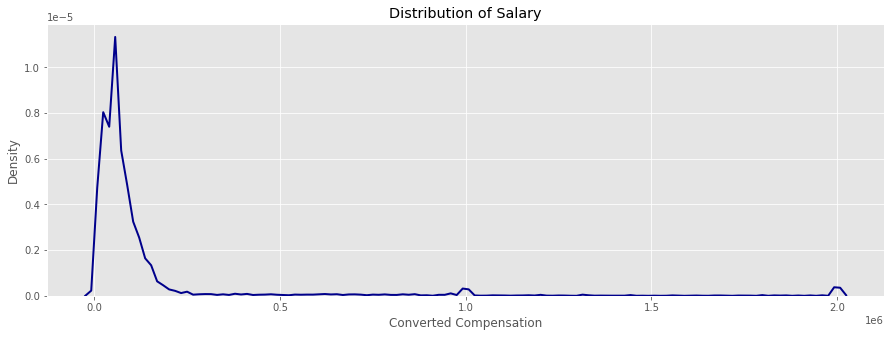

In [45]:
#Creating a Distribution plot
fig, ax = plt.subplots(figsize=(15,5))

sns.distplot(ax = ax, a=CC_sort, hist=False, kde=True, color = 'darkblue', kde_kws={'linewidth': 2})

plt.title('Distribution of Salary')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')

plt.show()

Plot the histogram for the column `ConvertedComp`.


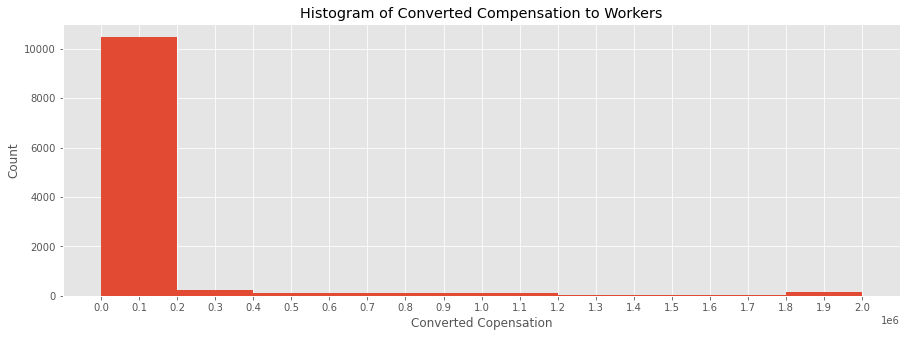

In [52]:
# your code goes here
count, bin_edges = np.histogram(CC_sort, 20)

CC_sort.plot(kind='hist', xticks=bin_edges, figsize=(15, 5))

plt.title('Histogram of Converted Compensation to Workers')
plt.xlabel('Converted Copensation')
plt.ylabel('Count')

plt.show()

What is the median of the column `ConvertedComp`?


In [53]:
# your code goes here
print('The median of the column Converted Compensation is {}'.format(CC_sort.median()))

The median of the column Converted Compensation is 57745.0


How many responders identified themselves only as a **Man**?


In [55]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [64]:
# your code goes here
Woman = df[df['Gender'] == 'Woman']
Woman_comp = Woman[['Gender', 'ConvertedComp']]
print('The median converted compensation for woman is {}'.format(Woman_comp.median()))

The median converted compensation for woman is ConvertedComp    57708.0
dtype: float64


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [74]:
# your code goes here
Age = df['Age']

Age.replace(np.nan, df['Age'].median(), inplace=True)
Age.describe()

count    11398.000000
mean        30.734102
std          7.305317
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


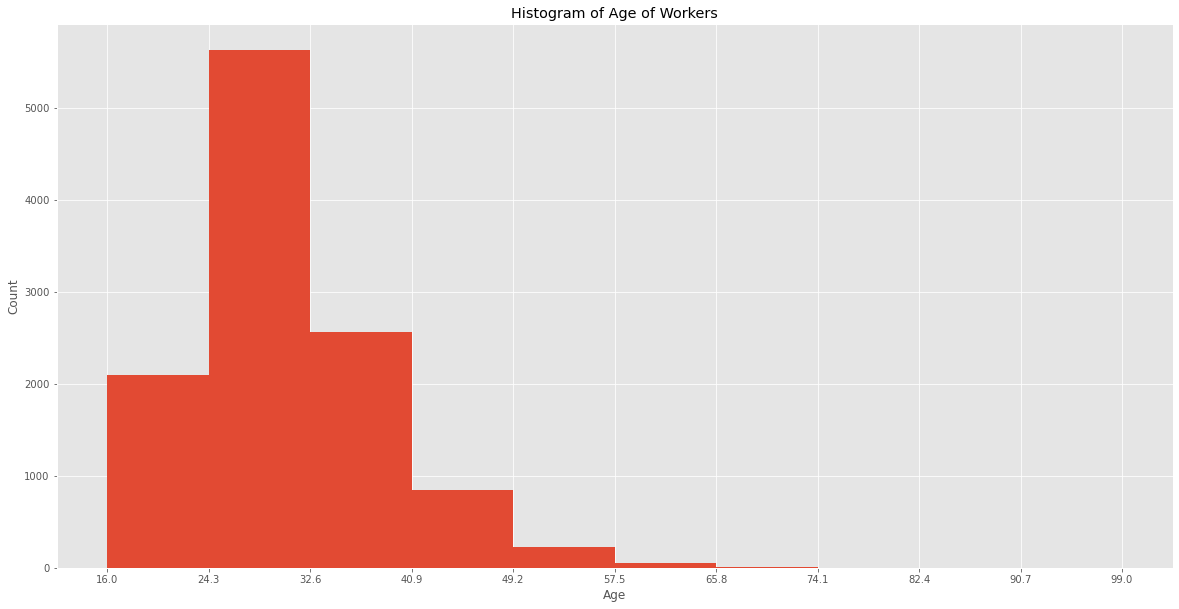

In [83]:
# your code goes here
count, bin_edges = np.histogram(Age, 10)

Age.plot(kind='hist', xticks=bin_edges, figsize=(20, 10))

plt.title('Histogram of Age of Workers')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


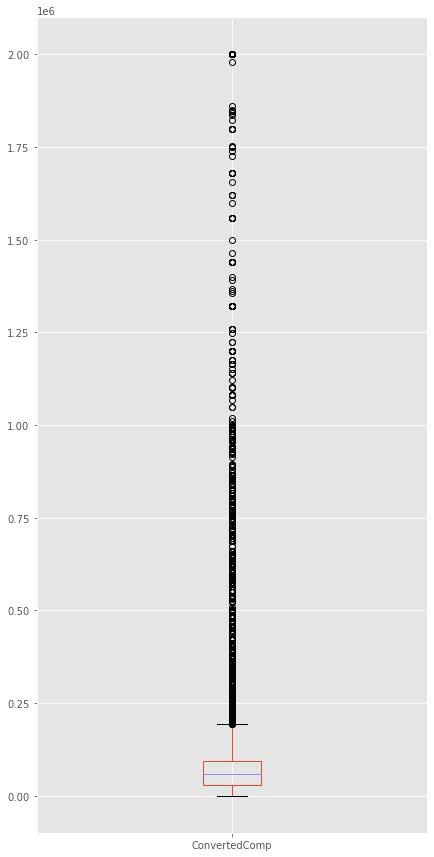

In [111]:
# your code goes here
CC_sort.plot(kind='box', figsize=(7, 15))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [93]:
# your code goes here
Q1 = CC_sort.quantile(0.25)
Q3 = CC_sort.quantile(0.75)
IQR = Q3-Q1
print('IQR:', IQR)

IQR: 65984.0


Find out the upper and lower bounds.


In [90]:
# your code goes here
print('Q1: {} and Q3: {}'.format(Q1, Q3))

Q1: 29016.0 and Q3: 95000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [104]:
# your code goes here
maximum = Q3 + (1.5*IQR)
maximum
CC_NoOutliers = CC_sort[CC_sort<maximum]
print('There were {} outliers'.format(len(CC_sort)-len(CC_NoOutliers)))

There were 933 outliers


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [106]:
# your code goes here
CC_NoOutliers.describe()

count     10465.000000
mean      58992.503392
std       40544.600719
min           0.000000
25%       26424.000000
50%       57287.000000
75%       81000.000000
max      192500.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


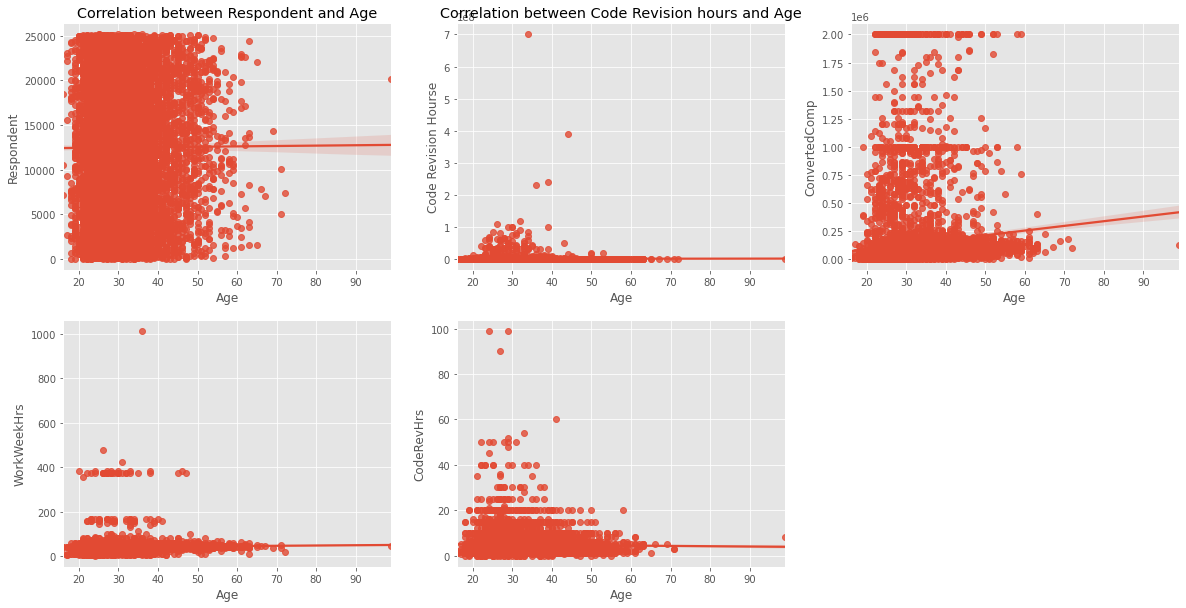

In [122]:
# your code goes here
fig = plt.figure(figsize=(20, 10)) # create figure

ax0 = fig.add_subplot(2, 3, 1) 
ax1 = fig.add_subplot(2, 3, 2) 
ax2 = fig.add_subplot(2, 3, 3) 
ax3 = fig.add_subplot(2, 3, 4) 
ax4 = fig.add_subplot(2, 3, 5) 

# Subplot 1: Respondent ~ Age
sns.regplot(x='Age', y='Respondent', data=df, ax=ax0) 

ax0.set_title('Correlation between Respondent and Age')
ax0.set_xlabel('Age')
ax0.set_ylabel('Respondent')

# Subplot 2: CompTotal ~ Age
sns.regplot(x='Age', y='CompTotal', data=df, ax=ax1)

ax1.set_title('Correlation between Total Compensation and Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Total Compensation')

# Subplot 3: ConvertedComp ~ Age
sns.regplot(x='Age', y='ConvertedComp', data=df, ax=ax2)

ax1.set_title('Correlation between Converted Compensation and Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Converted Compensation')

# Subplot 4: WorkWeekHrs ~ Age
sns.regplot(x='Age', y='WorkWeekHrs', data=df, ax=ax3)

ax1.set_title('Correlation between Work Week hours and Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Work Week Hours')

# Subplot 5: CodeRevHrs ~ Age
sns.regplot(x='Age', y='CodeRevHrs', data=df, ax=ax4)

ax1.set_title('Correlation between Code Revision hours and Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Code Revision Hourse')

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
